In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'data_sets.csv')

In [3]:
dataset

,cgpa,score,placed
0,8.56,7.92,1
1,7.81,6.37,1
2,6.92,5.78,0
3,8.02,7.21,1
4,6.45,5.63,0
...,...,...,...
146,6.79,5.86,0
147,7.20,6.45,1
148,8.26,7.48,1
149,6.42,5.51,0


<Axes: xlabel='cgpa', ylabel='score'>

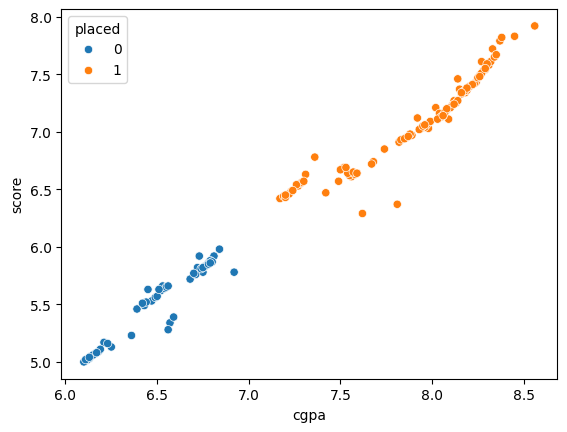

In [4]:
sns.scatterplot(x=dataset['cgpa'],y = dataset['score'],hue=dataset['placed'])

In [5]:
from sklearn.linear_model import Perceptron

In [6]:
pct = Perceptron()

In [7]:
X = dataset.iloc[:,:-1]

In [8]:
y = dataset.iloc[:,-1]

In [9]:
pct.fit(X,y)

Perceptron()

In [10]:
pct.coef_

array([[-28.29,  43.56]])

In [11]:
pct.intercept_

array([-50.])

In [12]:
from mlxtend.plotting import plot_decision_regions

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

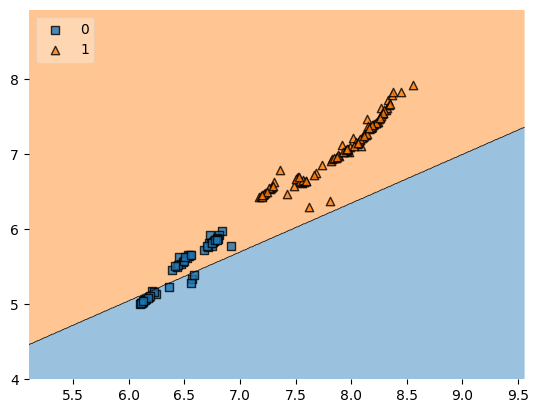

In [13]:
plot_decision_regions(X.values,y.values,clf=pct,legend=2)

## Neural Network for Placement Dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dataset = pd.read_csv(r'data_sets.csv')

In [16]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# from sklearn import preprocessing

# scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
from tensorflow import keras

In [20]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid',kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8833 - loss: 0.2547 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8833 - loss: 0.2534 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8833 - loss: 0.2522 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8917 - loss: 0.2510 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8917 - loss: 0.2498 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2486 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2474 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2463 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2451 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2440 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - loss: 0.2429 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9000 - lo

In [22]:
coef, intercept = model.get_weights()
coef, intercept

(array([[1.3342834],
        [1.3420101]], dtype=float32),
 array([0.35379767], dtype=float32))

In [23]:
X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)
X_train.head()

,0,1
0,-1.133940,-1.427367
1,-1.670452,-1.740060
2,1.226712,1.434983
3,0.864566,0.737436
4,0.006148,-0.068352


In [24]:
y_train.head()

15     0
125    0
11     1
127    1
51     1
Name: placed, dtype: int64

In [25]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [26]:
def loss(y_true,y_predicted):
    epsilon = 1e-15
    y_predicted = [max(i, epsilon) for i in y_predicted]
    y_predicted = [min(i,1-epsilon) for i in y_predicted]
    y_predicted = np.array(y_predicted)
    return -np.mean(y_true * np.log(y_predicted)+(1-y_true)*np.log(1-y_predicted))

In [27]:
def sigmoid(x):
    return (1/(1+(np.exp(-x))))


In [28]:
class MyNN: 
    def __init__(self): 
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs): 
        self.w1, self.w2, self.bias = self.gradient_descent(X, y, epochs)


    def predict(self, X):
        fun = self.w1 * X[:,0] + self.w2 * X[:,1]
        new_fun = sigmoid(fun)
        return new_fun

    def gradient_descent(self, X, y_true,epochs):
        w1 = self.w1
        w2 = self.w2
        b = self.bias
        cgpa = X[:,0]
        score = X[:,1]
        learning_rate = 0.01
    
        for i in range(epochs):
            fun = w1*cgpa + w2*score + b
            y_predicted = sigmoid(fun)
            log_loss = loss(y_true,y_predicted)
    
            w1 = w1 - learning_rate * ((1/len(cgpa)*(np.dot(np.transpose(cgpa),(y_predicted-y_true)))))
            w2 = w2 - learning_rate * ((1/len(cgpa)*(np.dot(np.transpose(score),(y_predicted-y_true)))))
            b = b - learning_rate *((np.mean(y_predicted-y_true)))
    
            if(i%50==0):
                print(f"epochs: {i}, loss: {log_loss}, weight1: {w1}, weight2: {w2}, bias: {b}")
    
            if(log_loss<=0.1718   ):
                print(f"epochs: {i}, loss: {log_loss}, weight1: {w1}, weight2: {w2}, bias: {b}")
                break
        
        return  w1, w2 , b
        

In [29]:
custom_model = MyNN()
custom_model.fit(X_train, y_train,500)

epochs: 0, loss: 0.25509941698518446, weight1: 1.0008312412538094, weight2: 1.0008454993721014, bias: 0.0014456470163790721
epochs: 50, loss: 0.23893511213204252, weight1: 1.0405530938053642, weight2: 1.0413405471134292, bias: 0.07102402333448483
epochs: 100, loss: 0.22504719039178742, weight1: 1.077077457155186, weight2: 1.0787439998265365, bias: 0.13577494948293242
epochs: 150, loss: 0.21297840440662422, weight1: 1.1109131663785219, weight2: 1.1135484690193986, bias: 0.19630324756413475
epochs: 200, loss: 0.2023861630909767, weight1: 1.142462890044945, weight2: 1.1461428709590007, bias: 0.25310643754714324
epochs: 250, loss: 0.19300891650945376, weight1: 1.1720493713174471, weight2: 1.1768383183536706, bias: 0.3065987140970085
epochs: 300, loss: 0.18464360877541253, weight1: 1.1999343257901203, weight2: 1.2058866925902585, bias: 0.3571286771070372
epochs: 350, loss: 0.17713021532319567, weight1: 1.2263322527481295, weight2: 1.2334941686342535, bias: 0.40499261853626617
epochs: 389, l

In [30]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.97550035],
       [0.03423069],
       [0.9328572 ],
       [0.89061826],
       [0.01100586],
       [0.7501502 ],
       [0.6662595 ],
       [0.93597096],
       [0.920154  ],
       [0.97014296],
       [0.10422006],
       [0.1582093 ],
       [0.138947  ],
       [0.01566466],
       [0.80027866],
       [0.11996175],
       [0.6585361 ],
       [0.12365617],
       [0.10325949],
       [0.95574427],
       [0.98318624],
       [0.4295476 ],
       [0.9198622 ],
       [0.67962396],
       [0.9599257 ],
       [0.95038676],
       [0.50172704],
       [0.9670541 ],
       [0.01046626],
       [0.0348113 ],
       [0.89625025]], dtype=float32)

In [31]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9677 - loss: 0.1592


[0.15915299952030182, 0.9677419066429138]

In [32]:
custom_model.predict(X_test)

array([0.95735715, 0.03075557, 0.89356369, 0.83596236, 0.01063697,
       0.66740928, 0.57818485, 0.89799548, 0.87577066, 0.94889465,
       0.08785808, 0.13101127, 0.11563021, 0.0147952 , 0.72434963,
       0.10046021, 0.57029669, 0.10341372, 0.08708444, 0.92688203,
       0.96983376, 0.35538632, 0.87536973, 0.59194303, 0.93317692,
       0.91891872, 0.41971203, 0.94408875, 0.01014876, 0.03123818,
       0.84340931])

In [33]:
dataset.head(127)

,cgpa,score,placed
0,8.56,7.92,1
1,7.81,6.37,1
2,6.92,5.78,0
3,8.02,7.21,1
4,6.45,5.63,0
...,...,...,...
122,6.50,5.57,0
123,7.54,6.64,1
124,8.22,7.41,1
125,6.17,5.08,0


## Batch Gradient Descent

In [34]:
dataset = pd.read_csv(r'house_data.csv')
dataset.drop(columns=['id', 'date', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],inplace=True)

In [35]:
dataset.columns

Index(['price', 'bedrooms', 'sqft_living'], dtype='object')

In [36]:

X = dataset.iloc[:,1:3]
y.shape

(151,)

In [37]:
from sklearn import preprocessing

In [38]:
scaler_X = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()

# scale X (2 features)
X = scaler_X.fit_transform(dataset.drop('price', axis='columns'))

# scale y (1 feature)
y = scaler_y.fit_transform(dataset['price'].values.reshape(dataset.shape[0],1))



In [39]:
X.T.shape

(2, 21613)

In [40]:
w = np.ones(X.shape[1])
w.shape

(2,)

In [41]:
np.dot(w,X.T).shape

(21613,)

In [42]:
y.shape[0]

21613

In [43]:
def batch_gradient_descent(X,y_true,epochs):
    feature_shape = X.shape[1]
    total_length = X.shape[0]
    learning_rate = 0.01
    w = np.ones(X.shape[1])
    b = 0
    cost_list = []
    epochs_list = [] 
    for i in range(epochs):
        y_predicted = np.dot(w,X.T) + b
        fun = -(2/total_length)*(X.T.dot(y_true-y_predicted))
        bias = -(2/total_length)*(np.sum(y_true-y_predicted))
        w = w - (learning_rate * fun)
        b = b - (learning_rate * bias)


        cost = np.mean(np.square(y_true-y_predicted))
        
        if(i%10==0):
            cost_list.append(cost)
            epochs_list.append(i)
            print(f'bias:{b}, weight: {w}')
            

    return w, b, cost, cost_list,epochs_list

    

In [44]:
w, b, cost, cost_list, epochs_list = batch_gradient_descent(X,y.reshape(y.shape[0],),500)
w,b

bias:-0.0035247664453356455, weight: [0.99960991 0.99945209]
bias:-0.035007129880134644, weight: [0.99609457 0.9944848 ]
bias:-0.06055721882358875, weight: [0.99318675 0.99032403]
bias:-0.0812886490047578, weight: [0.99077243 0.98681851]
bias:-0.09810599044277639, weight: [0.98875901 0.98384535]
bias:-0.11174400908410852, weight: [0.98707126 0.98130476]
bias:-0.12279954207914286, weight: [0.98564809 0.97911567]
bias:-0.13175738949643057, weight: [0.98443987 0.97721222]
bias:-0.13901134569677157, weight: [0.98340628 0.97554092]
bias:-0.14488128274035728, weight: [0.98251457 0.97405833]
bias:-0.14962702693132798, weight: [0.98173814 0.97272914]
bias:-0.1534596304854937, weight: [0.98105539 0.97152469]
bias:-0.1565505273034215, weight: [0.98044877 0.9704217 ]
bias:-0.1590389700403447, weight: [0.97990402 0.96940124]
bias:-0.16103807110437257, weight: [0.97940955 0.96844795]
bias:-0.1626397096507528, weight: [0.97895598 0.96754935]
bias:-0.1639185174451101, weight: [0.97853564 0.96669531]


(array([0.9686242 , 0.94375831]), -0.16600459088364622)

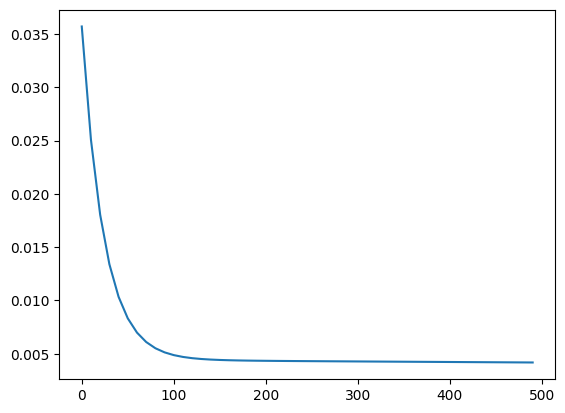

In [49]:
plt.plot(epochs_list, cost_list)

In [73]:
def batch_gradient_predict(X, y, w, b):
    # scaled_X = scaler_X.transform([[X, y]])[0]
    pred_scaled = w[0]*X + w[1]*y + b
    # real_value = scaler_y.inverse_transform([[57.34403180185184]])[0][0]
    # print(real_value)
    return pred_scaled



In [74]:
batch_gradient_predict(1960, 4,w,b)

1902.112470421368

In [48]:
dataset.head()

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680
